##Importación de Datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
filename=('/content/drive/MyDrive/Coding Dojo/Week 2/proyecto2/sales_predictions.csv')
df=pd.read_csv(filename)

##Exploración de Informacion 

In [4]:
df['Item_Weight']=df.loc[:,'Item_Weight'].interpolate(method='linear')
df['Outlet_Size']=df.loc[:,'Outlet_Size'].fillna(method='ffill')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Vizualizaciones 

##Diagrama de pastel 

In [6]:
#filtro 
ventas_producto= df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean()
ventas_producto

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [7]:
type(ventas_producto)

pandas.core.series.Series

In [8]:
ventas_produto=np.array(ventas_producto)
ventas_produto

array([ 339.82850046, 2316.18114811, 1995.49873922, 3694.03855765])

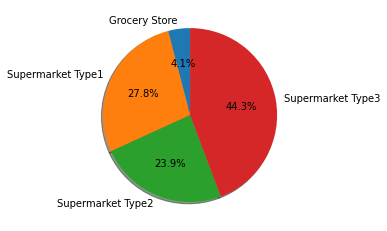

In [9]:
plt.pie(ventas_producto.values,labels=ventas_producto.index,
        autopct='%1.1f%%', shadow=True, startangle=90);
plt.show()

#histograma Gauseano 

distribucion de los precion de los productos

In [10]:
ventas=df['Item_MRP']
ventas

0       249.8092
1        48.2692
2       141.6180
3       182.0950
4        53.8614
          ...   
8518    214.5218
8519    108.1570
8520     85.1224
8521    103.1332
8522     75.4670
Name: Item_MRP, Length: 8523, dtype: float64

(array([ 923.,  573., 1053., 1248.,  804., 1098., 1200.,  480.,  557.,
         587.]),
 array([ 31.29   ,  54.84984,  78.40968, 101.96952, 125.52936, 149.0892 ,
        172.64904, 196.20888, 219.76872, 243.32856, 266.8884 ]),
 <a list of 10 Patch objects>)

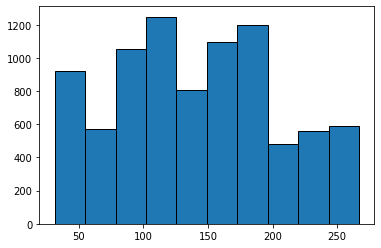

In [18]:
plt.hist(ventas.values,bins=10,edgecolor='black')

In [28]:
#histograma para ver el numero de productos segun el tipo de tienda 
tienda= df.groupby(['Outlet_Type'])['Item_Visibility'].sum()
tienda

Outlet_Type
Grocery Store        113.565873
Supermarket Type1    338.651189
Supermarket Type2     56.621454
Supermarket Type3     54.804764
Name: Item_Visibility, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

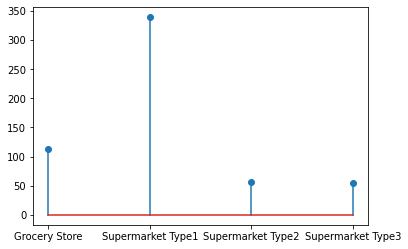

In [42]:
plt.stem(tienda.index,tienda.values)

{'boxes': [<matplotlib.lines.Line2D at 0x7f379e019350>,
 'caps': [<matplotlib.lines.Line2D at 0x7f379e0253d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f379e02c410>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f379e025e90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f379e019910>,
  <matplotlib.lines.Line2D at 0x7f379dfb73d0>]}

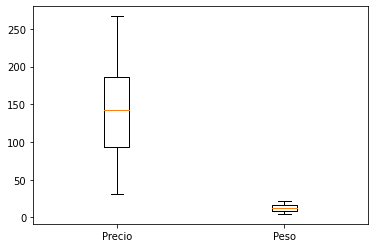

In [14]:
#diagrama de bigotes del peso de los productos, donde se encuentran los productos mas pesados frente a sus precios 
precio=df['Item_MRP'].values
peso= df['Item_Weight'].values
plt.boxplot([precio,peso], labels=['Precio', 'Peso'])
#Conclusion no existen ninguna proporcionalidad
